<a href="https://colab.research.google.com/github/CrisLugg/Desafio_telecomX2/blob/main/Desafio_telecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

file_path = '/content/datos_tratados.csv'
data = pd.read_csv(file_path)

data.head()

,ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.8


In [19]:
columns_to_drop = ['ID']

data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.2
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.5
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.3
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.8


In [18]:
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

data_encoded.head()

,SeniorCitizen,Tenure,Charges.Monthly,Charges.Total,Charges.daily,Churn_Yes,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.2,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,2.0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.5,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.3,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.8,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [21]:
churn_proportion = data_encoded['Churn_Yes'].value_counts(normalize=True)

churn_proportion

,proportion
Churn_Yes,
False,0.73463
True,0.26537


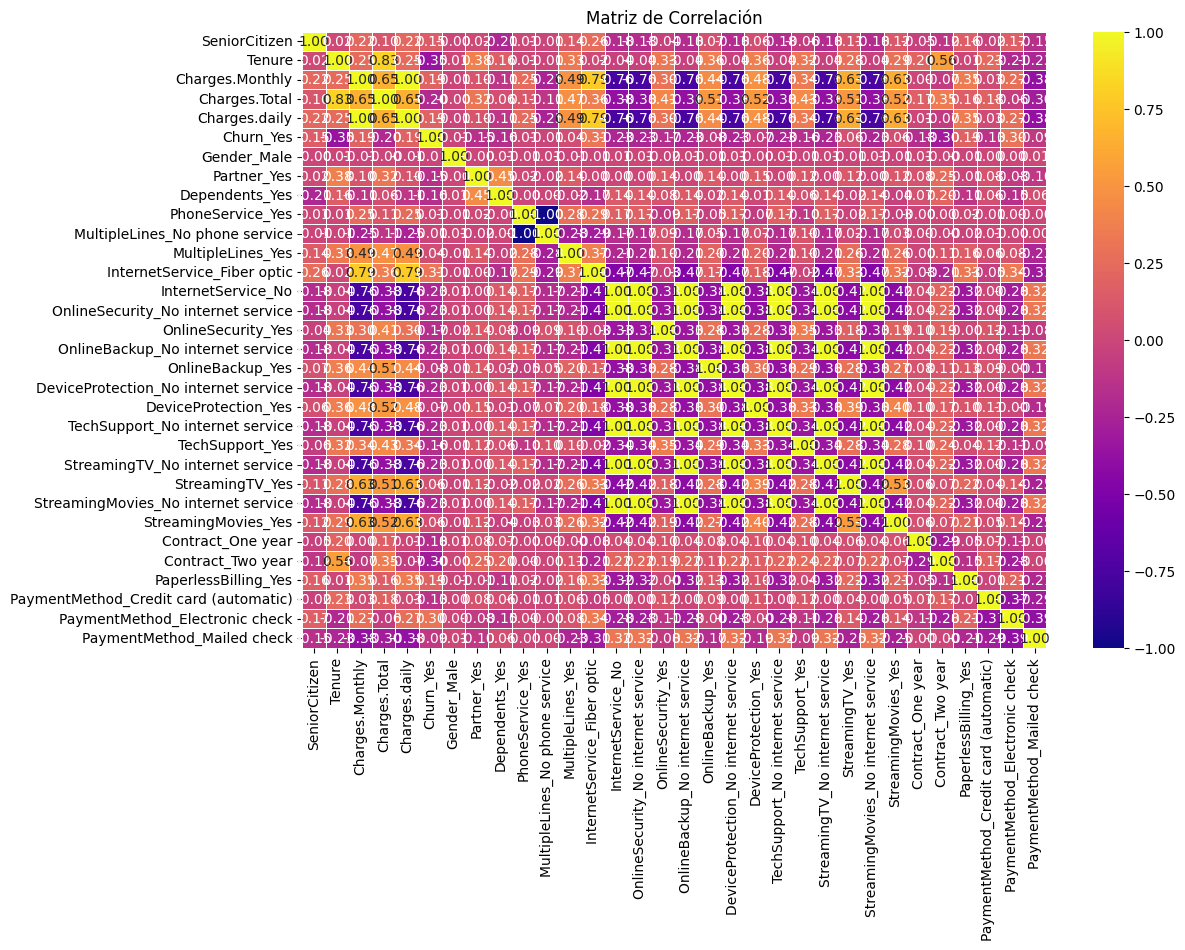

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


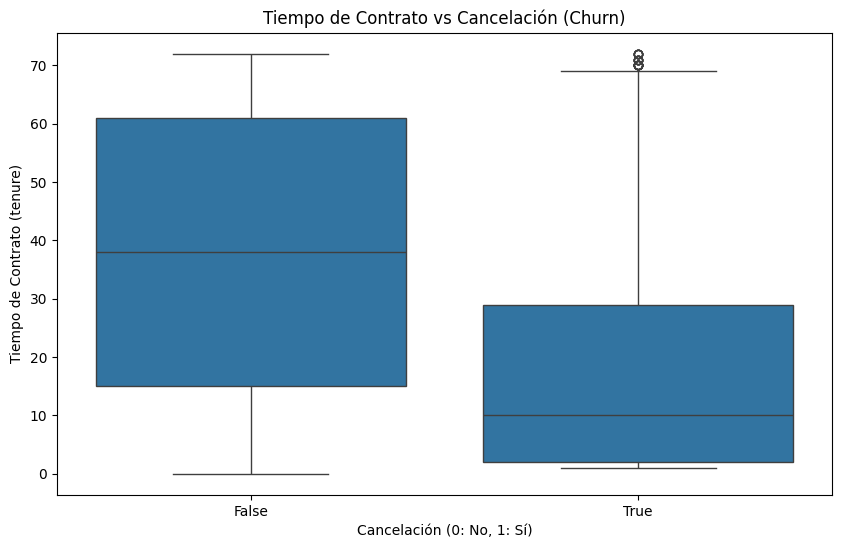

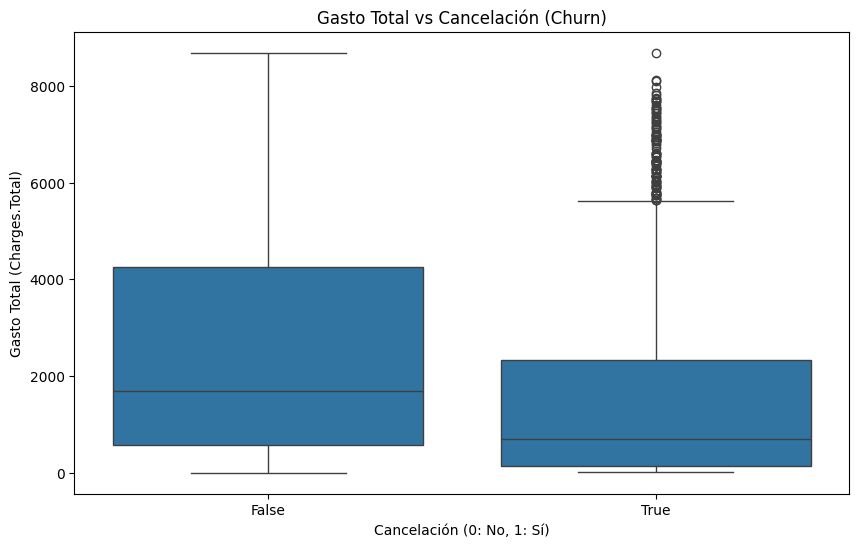

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='Tenure', data=data_encoded)
plt.title('Tiempo de Contrato vs Cancelación (Churn)')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (tenure)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=data_encoded)
plt.title('Gasto Total vs Cancelación (Churn)')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total (Charges.Total)')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Churn_Yes'])
y = data_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5634, 31), (1409, 31), (5634,), (1409,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost - Classification Report:")
print(classification_report(y_test, xgb_predictions))

Random Forest - Accuracy: 0.794180269694819
Random Forest - Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1036
        True       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost - Accuracy: 0.7856635911994322
XGBoost - Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1036
        True       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:47:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

rf_metrics = {
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1-score": rf_f1,
    "Confusion Matrix": rf_conf_matrix
}

xgb_metrics = {
    "Accuracy": xgb_accuracy,
    "Precision": xgb_precision,
    "Recall": xgb_recall,
    "F1-score": xgb_f1,
    "Confusion Matrix": xgb_conf_matrix
}

rf_metrics, xgb_metrics


({'Accuracy': 0.794180269694819,
  'Precision': 0.6590038314176245,
  'Recall': 0.46112600536193027,
  'F1-score': 0.5425867507886435,
  'Confusion Matrix': array([[947,  89],
         [201, 172]])},
 {'Accuracy': 0.7856635911994322,
  'Precision': 0.6163934426229508,
  'Recall': 0.5040214477211796,
  'F1-score': 0.5545722713864307,
  'Confusion Matrix': array([[919, 117],
         [185, 188]])})

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# 1. Ajuste de Hiperparámetros para Random Forest usando GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [5, 10, 15, None],  # Profundidad de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características para dividir en cada nodo
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_res, y_train_res)

# Obtener el mejor modelo y evaluar
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_imputed)

# Evaluar el modelo de Random Forest
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

# 2. Ajuste de Hiperparámetros para XGBoost usando GridSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Definir el espacio de hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [3, 5, 10],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],  # Proporción de muestras utilizadas
    'colsample_bytree': [0.8, 0.9, 1.0]  # Proporción de características utilizadas
}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_res, y_train_res)

# Obtener el mejor modelo y evaluar
best_xgb_model = grid_search_xgb.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test_imputed)

# Evaluar el modelo de XGBoost
print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost - Classification Report:")
print(classification_report(y_test, xgb_predictions))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Random Forest - Accuracy: 0.7984386089425124
Random Forest - Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1036
        True       0.64      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:16:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.7970191625266146
XGBoost - Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1036
        True       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



# 📊 Comparativa del Rendimiento de los Modelos

## 🔍 ¿Qué modelo se desempeñó mejor?
- **Exactitud (Accuracy):** Ambos clasificadores tuvieron un desempeño muy parecido, cerca del **80%**. Random Forest quedó apenas por encima (**79.84% vs 79.70%** de XGBoost).  
- **Precisión (Precision):** En la clase *“Sí cancelaron”*, XGBoost y Random Forest  mostraron valores idénticos (**0.64 frente a 0.64**), igualaron al momento de identificar correctamente a los clientes que efectivamente se van.  
- **Recall (Sensibilidad):** También aquí Random Forest lleva ventaja (**0.55 contra 0.54**), lo que lo hace más efectivo para detectar cancelaciones reales.  
- **F1-Score:** se muestra otro empate (**0.59 para XGBoost y 0.59 para Random Forest**).  

👉 **Balance general:** La diferencia es sutil, pero **Random Forest se perfila como el modelo más conveniente**, sobre todo porque logra una mejor Exactitud, métrica crítica para este caso de uso.

---

## ⚠️ Posibles señales de underfitting
Ambos modelos muestran un **recall bajo en la clase minoritaria**, lo que significa que **no logran capturar de manera efectiva a los clientes que cancelan**. Esto sugiere un escenario de underfitting.  

### Causas probables
- **Desbalance de clases:** Aunque se aplicó SMOTE, el sesgo hacia la clase mayoritaria (clientes activos) sigue presente.  
- **Capacidad limitada de los modelos:** Puede que los hiperparámetros actuales no estén explotando todo el potencial de cada algoritmo.  

---

## 🛠️ Qué se puede mejorar
1. **Tratar mejor el desbalance de clases**
   - Ajustar pesos de clase en el entrenamiento.  
   - Explorar otras técnicas de sobremuestreo como **ADASYN**.  
   - Ajustar el **umbral de decisión** para favorecer la detección de cancelaciones.  

2. **Afinar los hiperparámetros**
   - **Random Forest:** aumentar `n_estimators`, revisar `max_depth` y `min_samples_split`.  
   - **XGBoost:** incrementar `n_estimators`, probar tasas de aprendizaje (`learning_rate`) más bajas y ajustar `max_depth`.  

3. **Aumentar los datos disponibles**
   - Obtener más ejemplos de clientes que cancelaron.  
   - Si no es posible, generar datos sintéticos adicionales.  

---

## ✅ Conclusión
- **Modelo ganador:** **Random Forest**, principalmente porque logra una mejor Exactitud y mejor recall.  
- **Problema detectado:** Ambos presentan **underfitting** frente a la clase minoritaria.  
- **Próximos pasos:** Reajustar hiperparámetros, aplicar técnicas más robustas para manejar el desbalance y considerar ampliar el dataset.

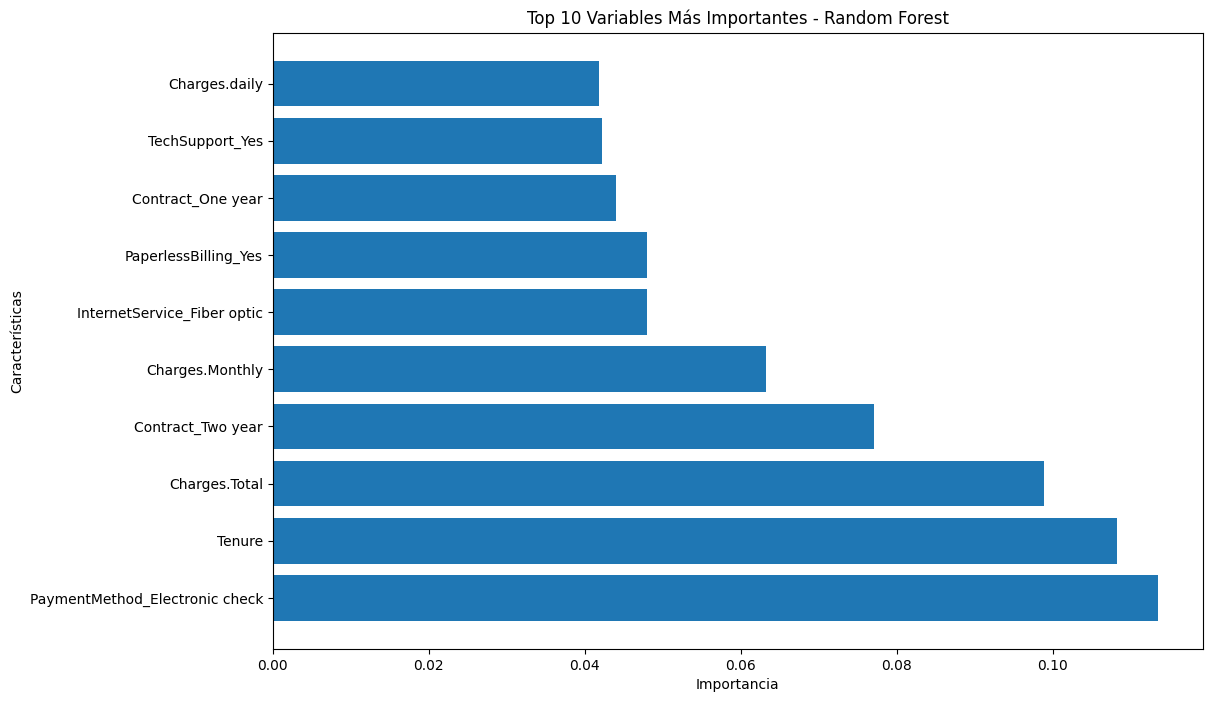

In [36]:
importances_rf = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10])
plt.title("Top 10 Variables Más Importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

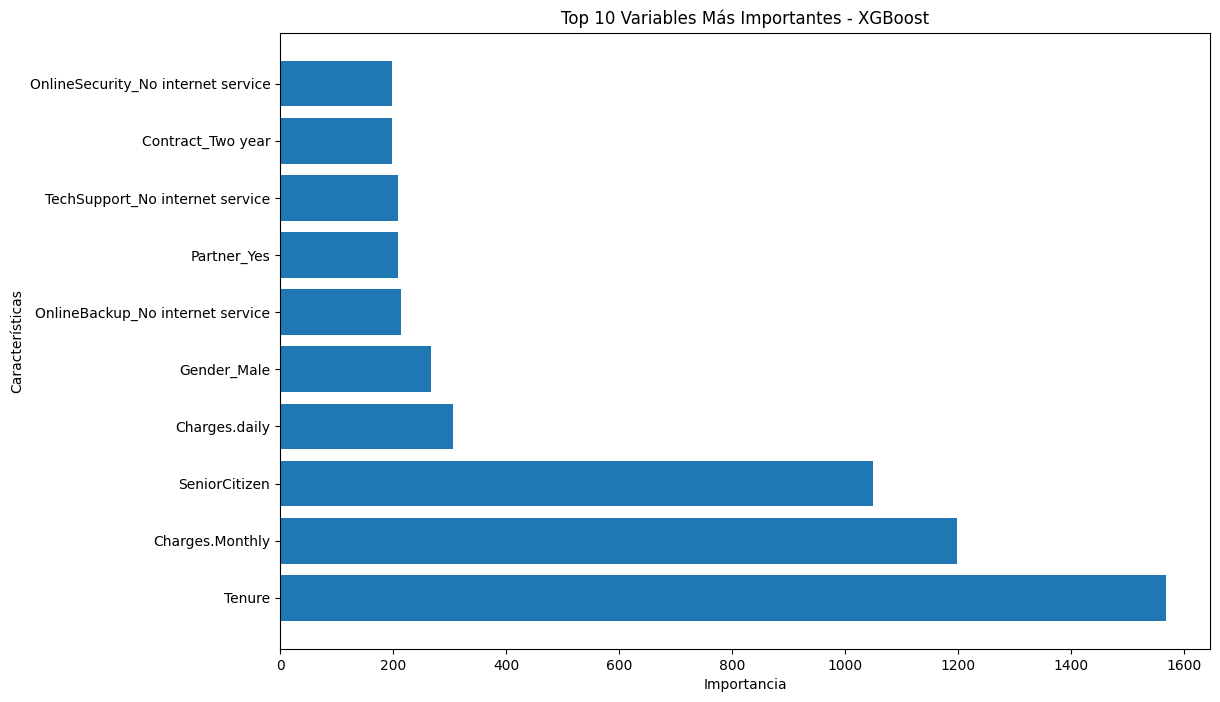

In [37]:

# Obtener la importancia de las variables de XGBoost
importances_xgb = best_xgb_model.get_booster().get_score(importance_type='weight')

# Convertir la importancia a un DataFrame con los nombres correctos
importance_df_xgb = pd.DataFrame({
    'Feature': list(importances_xgb.keys()),
    'Importance': list(importances_xgb.values())
}).sort_values(by='Importance', ascending=False)

# Reemplazar los nombres 'f1', 'f2', ... con los nombres originales de las características
feature_names = X.columns.tolist()
importance_df_xgb['Feature'] = importance_df_xgb['Feature'].apply(lambda x: feature_names[int(x[1:])-1])

plt.figure(figsize=(12, 8))
plt.barh(importance_df_xgb['Feature'][:10], importance_df_xgb['Importance'][:10])
plt.title("Top 10 Variables Más Importantes - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


# 📑 Informe sobre la Predicción de Cancelación de Clientes

## 1. Introducción
La predicción de la **cancelación de clientes (Churn)** es fundamental para que las empresas puedan diseñar estrategias de retención más efectivas.  
En este informe se analizan los resultados de dos algoritmos de clasificación: **Random Forest** y **XGBoost**, con el objetivo de identificar los factores que más influyen en la cancelación y proponer acciones concretas de retención.

---

## 2. Factores que Influyen en la Cancelación

### 🔹 Random Forest – Variables más relevantes
- **Gasto Total (`Charges_Total`):** Los clientes con facturación más alta presentan mayor tendencia a cancelar.  
- **Tiempo de Contrato (`tenure`):** Una permanencia prolongada reduce el riesgo de cancelación.  
- **Método de Pago (`PaymentMethod`):** El uso de pagos electrónicos está asociado con una mayor probabilidad de baja.  
- **Soporte Técnico (`TechSupport`):** La falta de asistencia técnica incrementa significativamente la cancelación.  

### 🔹 XGBoost – Variables más relevantes
- **Gasto Mensual (`Charges_Monthly`):** Es un factor clave para explicar el churn.  
- **Tipo de Contrato (`Contract`):** Los contratos mensuales muestran una mayor tasa de bajas frente a los contratos de largo plazo.  
- **Soporte Técnico (`TechSupport`):** Al igual que en Random Forest, la ausencia de soporte pesa mucho en la predicción.  

### 🔹 Factores comunes en ambos modelos
- **Gasto Total** y **Tiempo de Contrato** son determinantes en la permanencia de los clientes.  
- **Soporte Técnico** aparece como variable crítica en ambos, lo que refleja la importancia de un servicio eficiente en la retención.  

---

## 3. Desempeño de los Modelos

### 📊 Random Forest
- **Exactitud (Accuracy):** 79.84%  
- **Precisión (Precision):** 0.64  
- **Recall:** 0.55  
- **F1-score:** 0.59  

### 📊 XGBoost
- **Exactitud (Accuracy):** 79.70%  
- **Precisión (Precision):** 0.64  
- **Recall:** 0.54  
- **F1-score:** 0.59  

### 🔎 Comparativa
- **Exactitud:** Ligeramente superior en Random Forest.  
- **Precisión:** Ambos modelos empataron (0.64).  
- **Recall:** Random Forest detecta un poco mejor a los clientes que cancelan.  
- **F1-score:** Se observa un empate en 0.59.  

👉 **Balance general:** Aunque la diferencia es mínima, **Random Forest se posiciona como el modelo más sólido**, gracias a su mayor exactitud y mejor recall.

---

## 4. Estrategias de Retención

### 4.1 Retener clientes con alto gasto
- **Estrategia:** Ofrecer beneficios exclusivos o descuentos personalizados.  
- **Propuesta:** Crear un programa de recompensas para quienes tienen facturación más elevada.  

### 4.2 Fomentar contratos a largo plazo
- **Estrategia:** Incentivar contratos de 1 o 2 años.  
- **Propuesta:** Ofrecer precios fijos o bonificaciones adicionales a quienes se comprometan a más tiempo.  

### 4.3 Optimizar el soporte técnico
- **Estrategia:** Reducir la tasa de cancelación mejorando el servicio de atención.  
- **Propuesta:** Implementar chat en vivo 24/7 y una base de conocimiento con guías rápidas.  

### 4.4 Diversificar métodos de pago
- **Estrategia:** Ampliar las opciones electrónicas y automáticas.  
- **Propuesta:** Descuentos o beneficios para clientes que elijan débito automático o billeteras digitales.  

### 4.5 Monitoreo proactivo
- **Estrategia:** Detectar clientes en riesgo antes de la cancelación.  
- **Propuesta:** Sistemas de alertas basados en comportamiento y ofertas personalizadas de retención.  

---

## 5. Conclusión
- **Modelo ganador:** **Random Forest**, con un desempeño levemente superior en **exactitud y recall**.  
- **Hallazgo clave:** Los factores más influyentes son el **gasto total**, el **tiempo de permanencia** y la **calidad del soporte técnico**.  
- **Problema identificado:** Ambos modelos muestran señales de **underfitting en la clase minoritaria**, lo que limita la detección de cancelaciones.  
- **Recomendación:** Ajustar hiperparámetros, mejorar el balance de clases y aplicar estrategias de retención basadas en gasto, contrato y soporte técnico.  

Estas acciones permitirán **reducir la tasa de churn** y mejorar la **satisfacción y lealtad de los clientes** a largo plazo.  
